# Days of the Week

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

In [28]:
%run 'Color_and_Legends.ipynb'

In [29]:
%run 'Plotting_Tools.ipynb'

In [30]:
%run 'Load_Delay_Data_Frame.ipynb'

### Examine the days of the weeks and the number of delays, total delay and average delay  

In [31]:
day_grouping = ttc.groupby('Day')
min_delays = ttc['Min Delay']
days_size = day_grouping.size()/min_delays.count() * 100
days_total_delay = day_grouping['Min Delay'].sum()/min_delays.sum() * 100
days_average_delay = day_grouping['Min Delay'].mean()

## Days Only

Week days have a higher number and average total time delays but weekends can have an **average** longer delay.

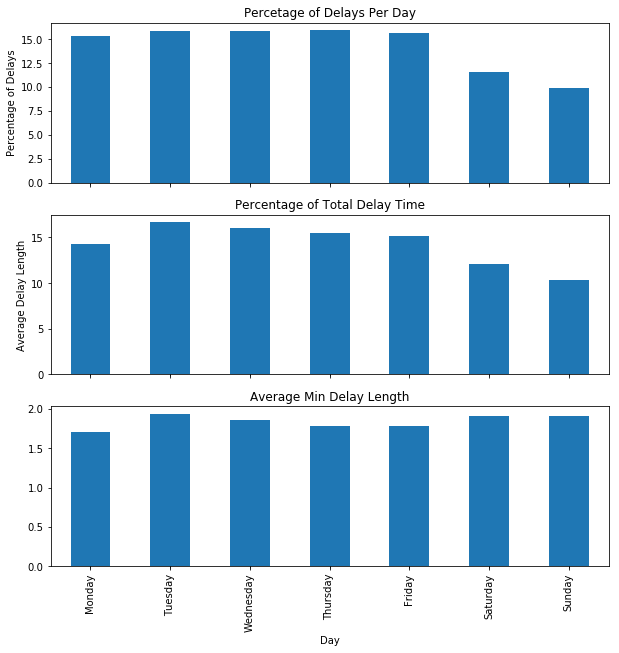

In [32]:
fig, ax = plt.subplots(3,1, figsize=[10,10], sharex = True)                           
days_size.plot.bar(ax=ax[0], title='Percetage of Delays Per Day')
ax[0].set_ylabel('Percentage of Delays')

days_total_delay.plot.bar(ax=ax[1], title='Percentage of Total Delay Time')
ax[1].set_ylabel('Percentage of Delay Time')

days_average_delay.plot.bar(ax=ax[2], title='Average Min Delay Length')
ax[1].set_ylabel('Average Delay Length')

plt.show()

### Breakdown By Line

In [33]:
days_per_line = ttc.pivot_table(index='Day', columns='Line', aggfunc=len, values='Time')
days_per_line_normalized = pd.crosstab(ttc.Day, ttc.Line, normalize='columns')

We can see the same trend of weekends have fewer delays is consistent across all the lines

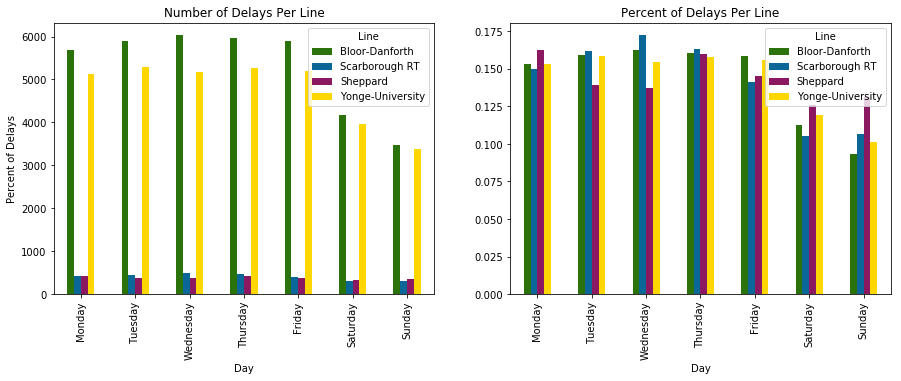

In [34]:
fix, ax = plt.subplots(1,2, figsize=[15,5])

days_per_line.plot.bar(color=colors, ax=ax[0], title='Number of Delays Per Line')
ax[0].set_ylabel('Number of Delays')

days_per_line_normalized.plot.bar(color=colors,ax=ax[1], title='Percent of Delays Per Line')
ax[0].set_ylabel('Percent of Delays')

plt.show()

In [35]:
groups = ttc.groupby(['Line'])

num_delays = pd.DataFrame()
total_delays = pd.DataFrame()
average_delays = pd.DataFrame()

for title, g in groups:
    num_delays[title] = g.groupby('Day').size() \
    .apply(lambda x: x / g.groupby('Line').size().sum() * 100)

for title, g in groups:
    total_delays[title] = g.groupby('Day')['Min Delay'].sum() \
    .apply(lambda x: x / g.groupby('Day')['Min Delay'].sum().sum() * 100)
    
for title, g in groups:
    average_delays[title] = g.groupby('Day')['Min Delay'].mean()

### Total Number, Total Delay, Average Delay across the Lines

An interesting thing to see in the **Average Total Delay** is **Scarborough** actually ends up having more delays on Sunday's compared to the other days

The **average** delay again shows higher average delays on weekends.

It's interesting that the ratios of the average delays across the lines seem to always be consistent between the lines
Scarborough > Sheppard > Yonge-University > Bloor-Danforth

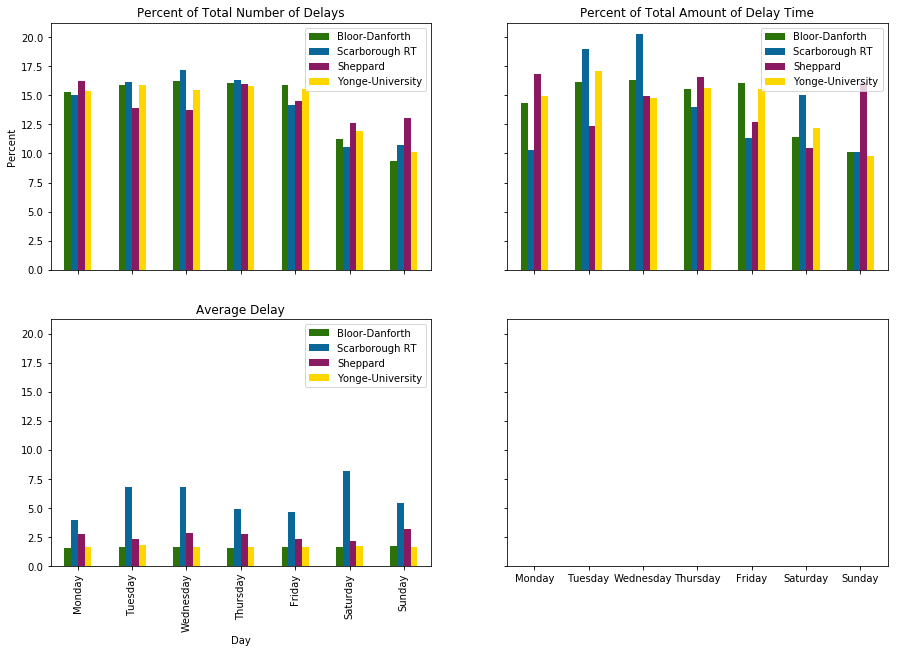

In [36]:
fig, ax = plt.subplots(2,2, figsize=[15,10], sharex = True, sharey=True) 
num_delays.plot.bar(color=colors, ax=ax[0][0], title = 'Percent of Total Number of Delays')
ax[0][0].set_ylabel('Percent')
total_delays.plot.bar(color=colors, ax=ax[0][1], title = 'Percent of Total Amount of Delay Time')
average_delays.plot.bar(color=colors, ax=ax[1][0], title = "Average Delay")
plt.show()

## Week Day and Time Breakdown

We see the common spikes during the week days around rush hour 

**TODO** fix the time to go 0 -- 23

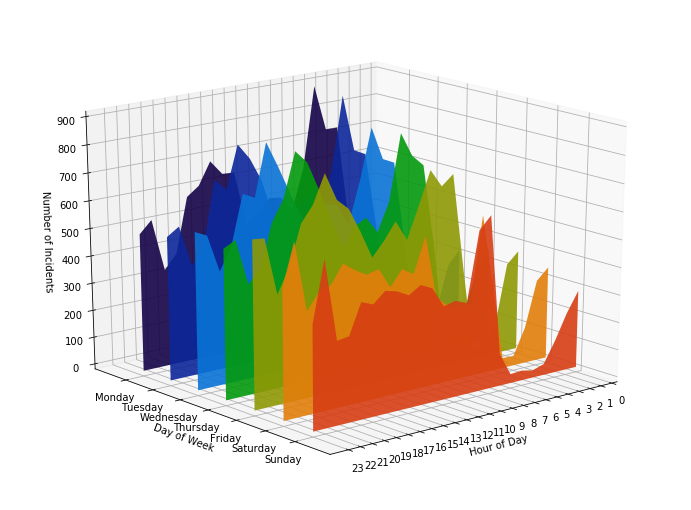

In [38]:
day_time_delays = ttc.groupby(['Hour', 'Day']).size().unstack()
days = ttc['Day'].unique().sort_values()
plot_3d_line(day_time_delays, days, days, c=day_colors, maxValue=900, xlabel='Hour of Day', ylabel='Day of Week', zlabel='Number of Incidents')

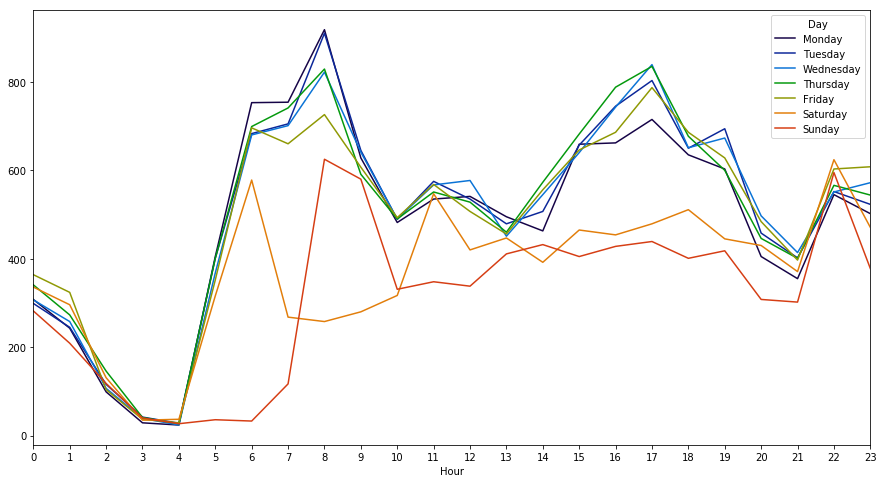

In [66]:
day_time_delays.plot(figsize=(15,8), color = day_colors)
plt.xticks(np.arange(0,24))
plt.show()

### Normalized Data

In [54]:
hour_day_groups = ttc.groupby(['Day'])
hour_day_percent = pd.DataFrame()

for title, g in hour_day_groups:
    hour_day_percent[title] = g.groupby('Hour').size() \
    .apply(lambda x: x / g.groupby('Day').size().sum() * 100)

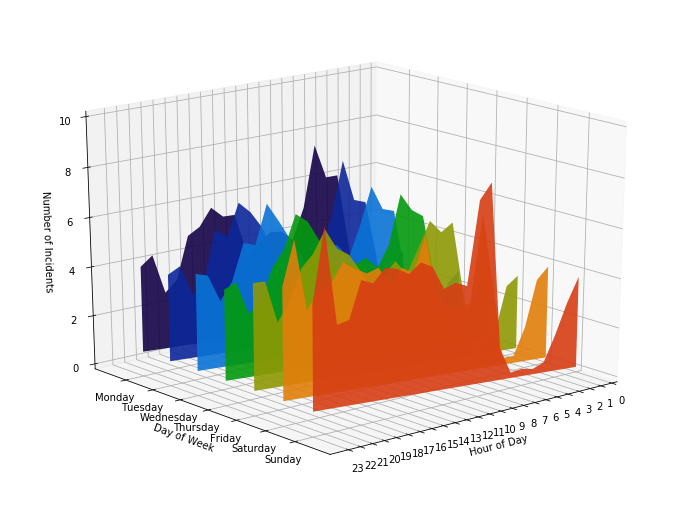

In [56]:
days = ttc['Day'].unique().sort_values()
plot_3d_line(hour_day_percent, days, days, c=day_colors, maxValue=10, xlabel='Hour of Day', ylabel='Day of Week', zlabel='Number of Incidents')

**Weekends** have a morning peak but then are more calmn and have a much larger second peak much later in the evening
**SUNDAY** service starts later at 8pm which may explain the sudeen large amoutn of delays at this time

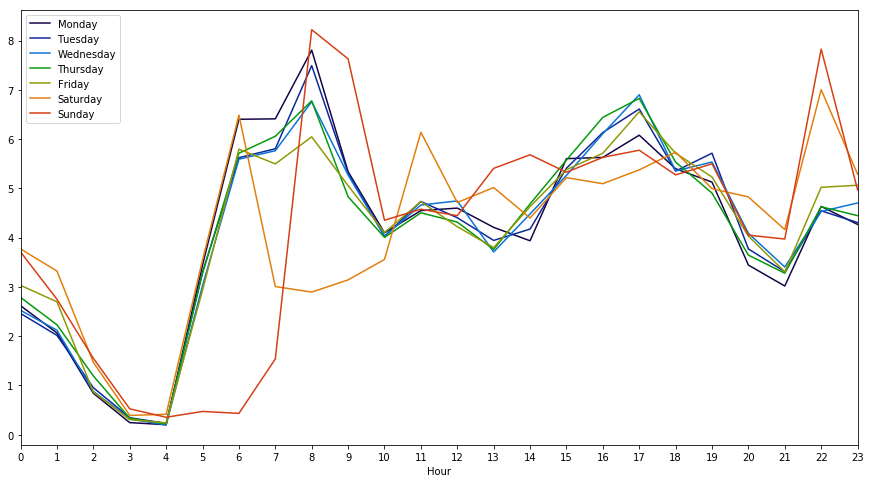

In [68]:
hour_day_percent.plot(figsize=(15,8), color = day_colors)
plt.xticks(np.arange(0,24))
plt.show()